# Predicting Cover-Type of a Forest



This project explores predicting forest cover type based on a few parameters: hillshade, elevation, soil type, etc. Since the data is labeled, this is a supervised learning task, using ML to make a classification prediction. 

## 0. Importing Libraries

In [46]:
# Import Libraries
import pandas as pd
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
import xgboost as xgb

In [3]:
!pip install pandas_profiling

In [4]:
import pandas_profiling

## 1. Exploring Initial Dataset

I will use the pandas profiling package to get a quick glimpse of the data - do explore any missing values, general distribution, and types of correlation matrices. 

In [5]:
df = pd.read_csv('covtype.data')

In [6]:
df.head()

2596   51   3  258    0   510  221  232  148  6279 ...  0.34  0.35  0.36  \
0  2590   56   2  212   -6   390  220  235  151  6225 ...     0     0     0   
1  2804  139   9  268   65  3180  234  238  135  6121 ...     0     0     0   
2  2785  155  18  242  118  3090  238  238  122  6211 ...     0     0     0   
3  2595   45   2  153   -1   391  220  234  150  6172 ...     0     0     0   
4  2579  132   6  300  -15    67  230  237  140  6031 ...     0     0     0   

   0.37  0.38  0.39  0.40  0.41  0.42  5  
0     0     0     0     0     0     0  5  
1     0     0     0     0     0     0  2  
2     0     0     0     0     0     0  2  
3     0     0     0     0     0     0  5  
4     0     0     0     0     0     0  2  

[5 rows x 55 columns]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581011 entries, 0 to 581010
Data columns (total 55 columns):
2596    581011 non-null int64
51      581011 non-null int64
3       581011 non-null int64
258     581011 non-null int64
0       581011 non-null int64
510     581011 non-null int64
221     581011 non-null int64
232     581011 non-null int64
148     581011 non-null int64
6279    581011 non-null int64
1       581011 non-null int64
0.1     581011 non-null int64
0.2     581011 non-null int64
0.3     581011 non-null int64
0.4     581011 non-null int64
0.5     581011 non-null int64
0.6     581011 non-null int64
0.7     581011 non-null int64
0.8     581011 non-null int64
0.9     581011 non-null int64
0.10    581011 non-null int64
0.11    581011 non-null int64
0.12    581011 non-null int64
0.13    581011 non-null int64
0.14    581011 non-null int64
0.15    581011 non-null int64
0.16    581011 non-null int64
0.17    581011 non-null int64
0.18    581011 non-null int64
0.19    581011 non-

Since this dataset is unlabeled, I did some research and found the proper column headers online. I add them to the dataset below

In [8]:
cols = ['elevation', 'aspect', 'slope', 'horizontal_distance_to_hydrology',
       'vertical_distance_to_hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area_1', 'Wilderness_Area_2', 'Wilderness_Area_3', 'Wilderness_Area_4',
       'Soil_Type_1','Soil_Type_2','Soil_Type_3','Soil_Type_4','Soil_Type_5','Soil_Type_6','Soil_Type_7',
        'Soil_Type_8','Soil_Type_9','Soil_Type_10','Soil_Type_11','Soil_Type_12','Soil_Type_13',
        'Soil_Type_14','Soil_Type_15','Soil_Type_16','Soil_Type_17','Soil_Type_18','Soil_Type_19',
        'Soil_Type_20','Soil_Type_21','Soil_Type_22','Soil_Type_23','Soil_Type_24','Soil_Type_25',
        'Soil_Type_26','Soil_Type_27','Soil_Type_28','Soil_Type_29','Soil_Type_30','Soil_Type_31',
        'Soil_Type_32','Soil_Type_33','Soil_Type_34','Soil_Type_35','Soil_Type_36','Soil_Type_37',
        'Soil_Type_38','Soil_Type_39','Soil_Type_40','Cover_Type']

In [9]:
df.columns = cols

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581011 entries, 0 to 581010
Data columns (total 55 columns):
elevation                             581011 non-null int64
aspect                                581011 non-null int64
slope                                 581011 non-null int64
horizontal_distance_to_hydrology      581011 non-null int64
vertical_distance_to_hydrology        581011 non-null int64
Horizontal_Distance_To_Roadways       581011 non-null int64
Hillshade_9am                         581011 non-null int64
Hillshade_Noon                        581011 non-null int64
Hillshade_3pm                         581011 non-null int64
Horizontal_Distance_To_Fire_Points    581011 non-null int64
Wilderness_Area_1                     581011 non-null int64
Wilderness_Area_2                     581011 non-null int64
Wilderness_Area_3                     581011 non-null int64
Wilderness_Area_4                     581011 non-null int64
Soil_Type_1                           581011 non-

In [15]:
pd.set_option('display.max_columns', None)
df.describe()

elevation         aspect          slope  \
count  581011.000000  581011.000000  581011.000000   
mean     2959.365926     155.656988      14.103723   
std       279.984569     111.913733       7.488234   
min      1859.000000       0.000000       0.000000   
25%      2809.000000      58.000000       9.000000   
50%      2996.000000     127.000000      13.000000   
75%      3163.000000     260.000000      18.000000   
max      3858.000000     360.000000      66.000000   

       horizontal_distance_to_hydrology  vertical_distance_to_hydrology  \
count                     581011.000000                   581011.000000   
mean                         269.428236                       46.418935   
std                          212.549538                       58.295250   
min                            0.000000                     -173.000000   
25%                          108.000000                        7.000000   
50%                          218.000000                       30.000000   
75%                          384.000000                       69.000000   
max                         1397.000000                      601.000000   

       Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  \
count                    581011.000000  581011.000000   581011.000000   
mean                       2350.149779     212.146033      223.318701   
std                        1559.254343      26.769909       19.768711   
min                           0.000000       0.000000        0.000000   
25%                        1106.000000     198.000000      213.000000   
50%                        1997.000000     218.000000      226.000000   
75%                        3328.000000     231.000000      237.000000   
max                        7117.000000     254.000000      254.000000   

       Hillshade_3pm  Horizontal_Distance_To_Fire_Points  Wilderness_Area_1  \
count  581011.000000                       581011.000000      581011.000000   
mean      142.528253                         1980.283828           0.448864   
std        38.274561                         1324.184340           0.497379   
min         0.000000                            0.000000           0.000000   
25%       119.000000                         1024.000000           0.000000   
50%       143.000000                         1710.000000           0.000000   
75%       168.000000                         2550.000000           1.000000   
max       254.000000                         7173.000000           1.000000   

       Wilderness_Area_2  Wilderness_Area_3  Wilderness_Area_4    Soil_Type_1  \
count      581011.000000      581011.000000      581011.000000  581011.000000   
mean            0.051434           0.436074           0.063627       0.005217   
std             0.220882           0.495897           0.244088       0.072039   
min             0.000000           0.000000           0.000000       0.000000   
25%             0.000000           0.000000           0.000000       0.000000   
50%             0.000000           0.000000           0.000000       0.000000   
75%             0.000000           1.000000           0.000000       0.000000   
max             1.000000           1.000000           1.000000       1.000000   

         Soil_Type_2    Soil_Type_3    Soil_Type_4    Soil_Type_5  \
count  581011.000000  581011.000000  581011.000000  581011.000000   
mean        0.012952       0.008301       0.021335       0.002749   
std         0.113066       0.090731       0.144499       0.052356   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

         Soil_Type_6    Soil_Type_7    Soil_Type_8    Soil_Type_9  \
count  581011.000000  581011.000000  581011.000000  58101

In [61]:
# Check for NAs
df.isnull().values.any()

False

I also want to look at just the continuous variables, to get a better idea of any correlation. I'll create a separate data frame for that below

In [11]:
df_cont = pd.DataFrame(df[['elevation', 'aspect', 'slope', 'horizontal_distance_to_hydrology',
       'vertical_distance_to_hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points','Cover_Type']])

In [12]:
pandas_profiling.ProfileReport(df_cont)

The first observations are that there are a few highly corelated variables, along with some of the variables producing significant skew. Since we will be working with Random Forests and Decision Trees, we can leave this for now. However, it is important to note that we would have to check the assumptions of other algorithms for these cases if we were to use this dataset in the future. 

Lastly, we want to split the data into target and training datasets. Since the dataset is super large to begin with, for the initial round we will scale down the data to be much smaller for computational efficiency (ended up using this the whole way through for slow run times :/)

In [79]:
## Randomly select 50,000 rows from the initial dataset 
sample_df = df.sample(n = 50000)

In [86]:
x = array(sample_df.groupby('Cover_Type').size())

NameError: name 'array' is not defined

Cover_Type
1    18077
2    24518
3     3125
4      244
5      836
6     1466
7     1734
dtype: int64

In [17]:
# Remove target variable and store separately
target = sample_df['Cover_Type']
sample_df.drop("Cover_Type", axis=1, inplace=True)

In [62]:
# Split into training and testing sets
data_train, data_test, target_train, target_test = train_test_split(sample_df, target, 
                                                                   test_size = 0.25, random_state=119)

# 2. Build Regular tree as baseline


Let's first explore how a regular decision tree performs on this dataset

## 2.1 Building Tree

We build this decision tree with a few random parameters for a basic baseline

In [21]:
tree_clf = DecisionTreeClassifier(criterion = "gini", max_depth = 5) 
tree_clf.fit(data_train, target_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## 2.2 Feature Importance

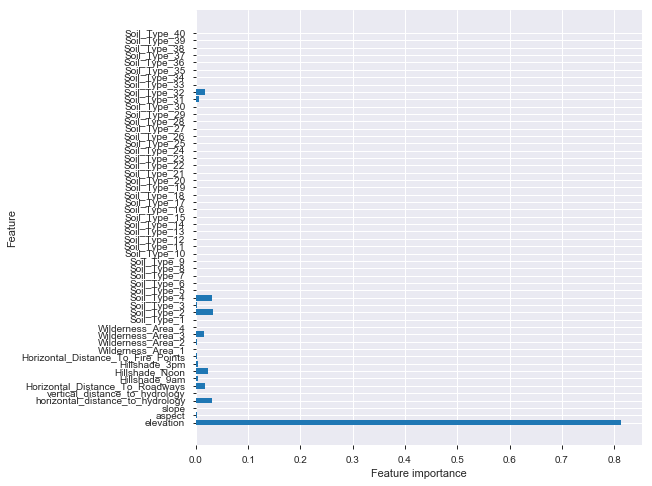

In [23]:
# Function that plots the feature importance of variables 
def plot_feature_importances(model):
    n_features = data_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), data_train.columns.values) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

plot_feature_importances(tree_clf)

In [24]:
# Get cross Validation Score
pred = tree_clf.predict(data_test)
print(confusion_matrix(target_test, pred))
print(classification_report(target_test, pred))

[[2789 1581    1    0    0    1  143]
 [ 989 5129   71    2    0    2   18]
 [   0  111  589    9    0    3    0]
 [   0    0   37   17    0    0    0]
 [   0  178    8    0    0    0    0]
 [   0  100  255    6    0    9    0]
 [ 207    4    0    0    0    0  241]]
              precision    recall  f1-score   support

           1       0.70      0.62      0.66      4515
           2       0.72      0.83      0.77      6211
           3       0.61      0.83      0.70       712
           4       0.50      0.31      0.39        54
           5       0.00      0.00      0.00       186
           6       0.60      0.02      0.05       370
           7       0.60      0.53      0.56       452

   micro avg       0.70      0.70      0.70     12500
   macro avg       0.53      0.45      0.45     12500
weighted avg       0.69      0.70      0.68     12500



In [25]:
print("Testing Accuracy for Decision Tree Classifier: {:.4}%".format(accuracy_score(target_test, pred) * 100))

Testing Accuracy for Decision Tree Classifier: 70.19%


Our baseline for the model is 70% accuracy, where elevation shows the highest feature importance 

## 2.3 Tune with Gridseach CV

In [35]:
# Parameter Grid for GridSearch
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6]
    }

In [70]:
# Create Empty Decision Tree Classifier, and pass it the parameter grid
df_cv = DecisionTreeClassifier()
dt_grid_search = GridSearchCV(df_cv, dt_param_grid, cv=3, return_train_score=True)
dt_grid_search.fit(data_test, target_test)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [None, 2, 3, 4, 5, 6], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 3, 4, 5, 6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [71]:
# Display the training and testing Results of the Gridsearch
dt_gs_training_score = np.mean(dt_grid_search.cv_results_['mean_train_score'])
dt_gs_testing_score = dt_grid_search.score(data_test, target_test)

print("Mean Training Score: {:.4}%".format(dt_gs_training_score * 100))
print("Mean Testing Score: {:.4}%".format(dt_gs_testing_score * 100))
print("Best Parameter Combination Found During Grid Search:")
dt_grid_search.best_params_

Mean Training Score: 73.4%
Mean Testing Score: 100.0%
Best Parameter Combination Found During Grid Search:


{'criterion': 'entropy',
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [72]:
# Create a new Decision Tree using the new parameters
tree_clf_better = DecisionTreeClassifier(criterion = "entropy", max_depth = None, min_samples_leaf = 1, 
                                         min_samples_split = 2) 
tree_clf_better.fit(data_train, target_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

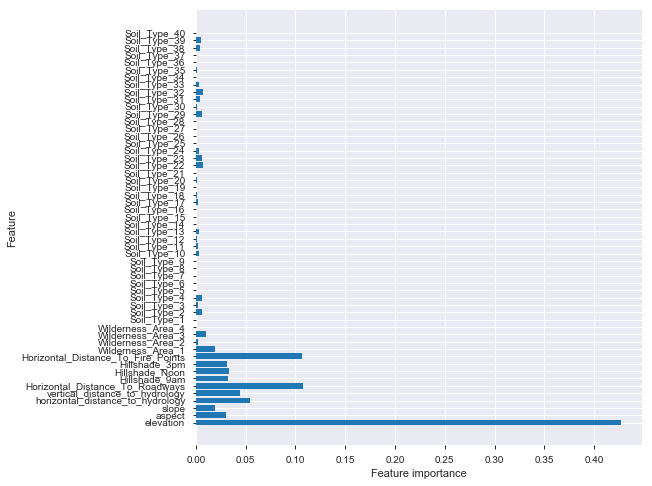

In [73]:
plot_feature_importances(tree_clf_better)

In [74]:
pred = tree_clf_better.predict(data_test)

In [75]:
print("Testing Accuracy for Decision Tree Classifier: {:.4}%".format(accuracy_score(target_test, pred) * 100))

Testing Accuracy for Decision Tree Classifier: 82.2%


Our accuracy increased in 82% from 70% using the gridsearch parameters!

# 3. Build Random Forest

## 3.1 Build Model - No GridSearch

Buildilding a RFC with random parameters for an idea of a baseline

In [31]:
forest = RandomForestClassifier(n_estimators=100, max_depth= 5)
forest.fit(data_train, target_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [32]:
forest.score(data_train, target_train)

0.6776266666666667

In [33]:
forest.score(data_test, target_test)

0.67544

These scores are pretty low. Let's look at feature importances to see what was significant

Looking at Feature Importances

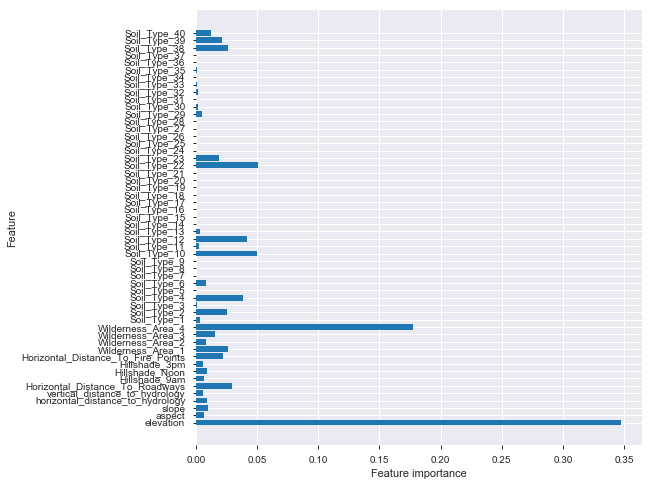

In [34]:
plot_feature_importances(forest)

## 3.3 Fine-tune with GridSearch

Since our score was so low using random parameters, it's better if we use Gridsearch to choose that for us. We will select a few parameters to explore in our gridsearch

In [44]:
rf_param_grid = {
    'n_estimators': [10, 30, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 6, 10],
    'min_samples_split': [10, 20],
    'min_samples_leaf': [1, 2, 5]
}

Next we call a RFC object, and use the cross validation score to secure a baseline 

In [48]:
forest_2 = RandomForestClassifier()
mean_rf_cv_score = np.mean(cross_val_score(forest_2, data_train, target_train, cv=3))

In [49]:
print("Mean Cross Validation Score for Random Forest Classifier: {:.4}%".format(mean_rf_cv_score * 100))

Mean Cross Validation Score for Random Forest Classifier: 82.47%


Our baseline for performance is at 82.5% without passing any parameters. This is already slightly better than our decision tree. Next we will test the computation time on the training dataset and run a gridsearch to optimize the parameters

In [51]:
# See how long computation time is
import time
start = time.time()
# Pass Gridsearch the empty RFC object and the parameter data
rf_grid_search = GridSearchCV(forest_2, rf_param_grid, cv=3)
rf_grid_search.fit(data_train, target_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [10, 30, 100], 'criterion': ['gini', 'entropy'], 'max_depth': [None, 2, 6, 10], 'min_samples_split': [10, 20], 'min_samples_leaf': [1, 2, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [52]:
print("Testing Accuracy: {:.4}%".format(rf_grid_search.best_score_ * 100))
print("Total Runtime for Grid Search on Random Forest Classifier: {:.4} seconds".format(time.time() - start))
print("")
print("Optimal Parameters: {}".format(rf_grid_search.best_params_))

Testing Accuracy: 84.32%
Total Runtime for Grid Search on Random Forest Classifier: 410.1 seconds

Optimal Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}


Our Accuracy went up to 84.3%, which isn't super significant, but it's better than supplying zero parameters. Next we will build a RFC given the optimal parameters and see the scores of the training and target set

In [53]:
forest_cv = RandomForestClassifier(criterion = 'entropy', max_depth = None, min_samples_leaf = 1,
                                min_samples_split = 10, n_estimators=100)
forest_cv.fit(data_train, target_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [54]:
forest_cv.score(data_train, target_train)

0.9704

In [55]:
forest_cv.score(data_test, target_test)

0.86464

Our training set had a score of .97, and our testing set had one of .86, which is significantly better than when we ran the initial random forest with random parameters!

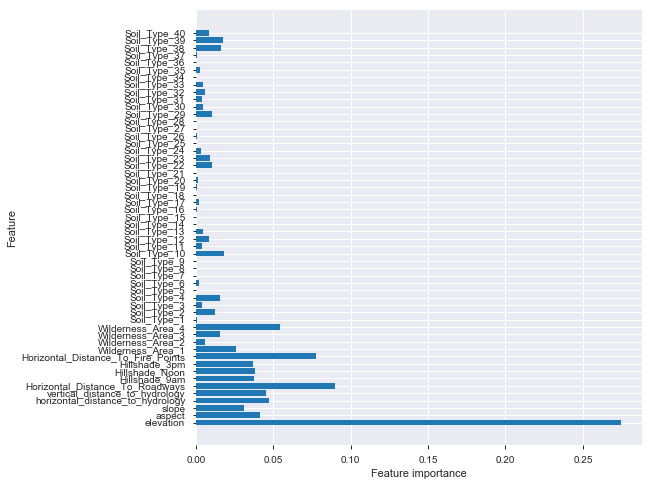

In [57]:
plot_feature_importances(forest_cv)

Looking at our features, the importance of the continuous variables increased as well, with elevation still remaining the most significant feature